# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

In [2]:
dataset = 'Breast Cancer'
# dataset = 'Pima Indian Diabetes'
# dataset = 'Hepatitis'
# dataset = 'Heart Disease'
model = 'SVM-rbf'

data_clf = data.get_real_dataset(dataset, scale=True, seed=0)
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

Breast Cancer: 569
Number of attribues: 30
Classes total: 357 - 212

Classes train: 178 - 17
Classes test:  179 - 195


## Get Classifier

Baseline


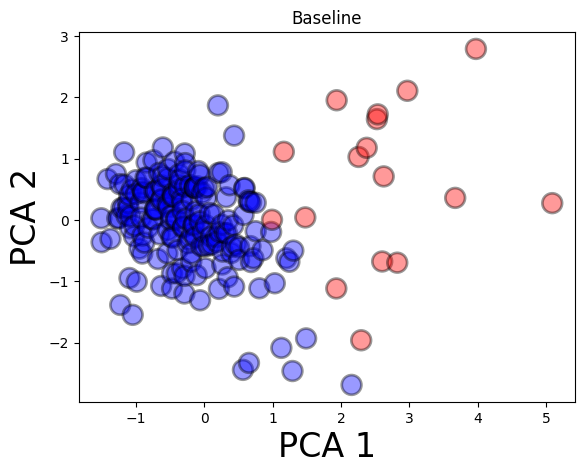

SMOTE


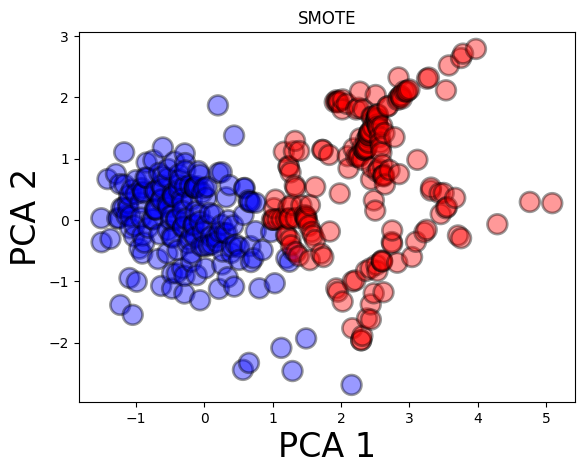

Balanced Weights


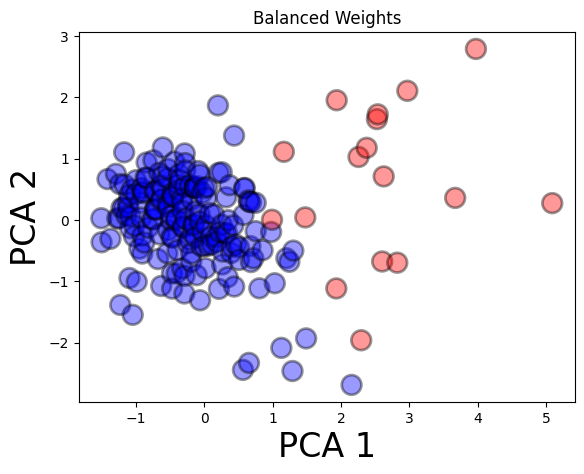

BMR


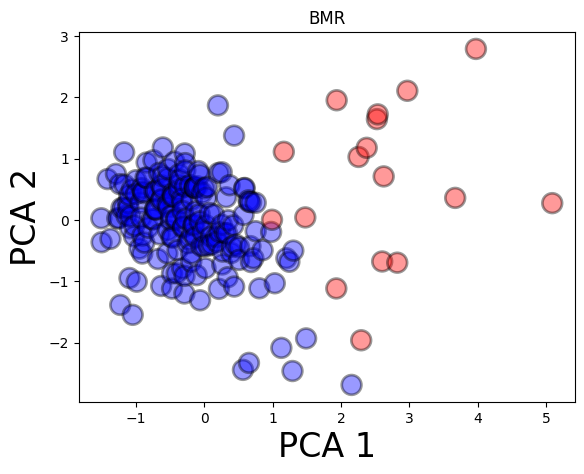

Threshold


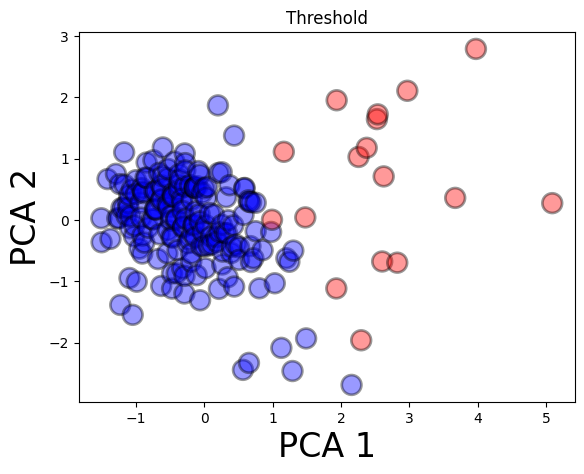

In [3]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      _plot=False,
    _plot_data=True)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=1,
                                                     _print=False, 
                                                     _plot=False, 
                                                     max_trials=10000, 
                                                     method='supports-prop-update_mean',
                                                     parallel=True)

## Plot training data information

plotting training data as data input


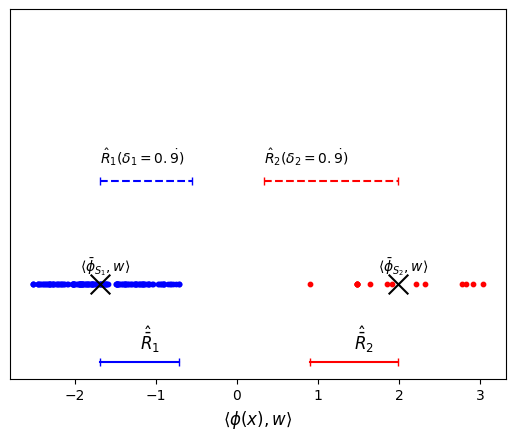

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [6]:
# deltas_model.print_params()

# Evaluation on test data

Baseline


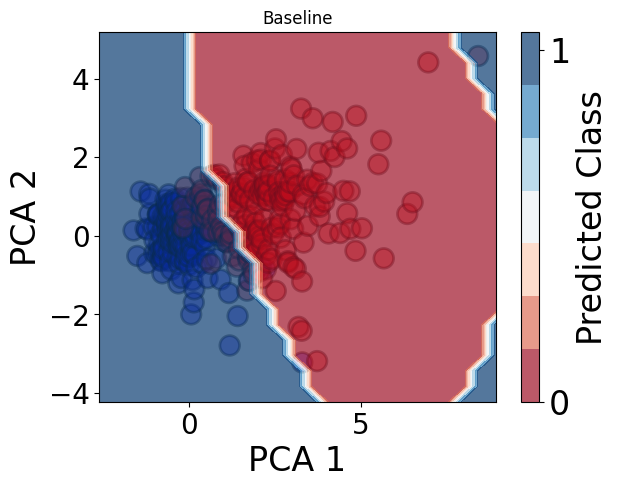

SMOTE


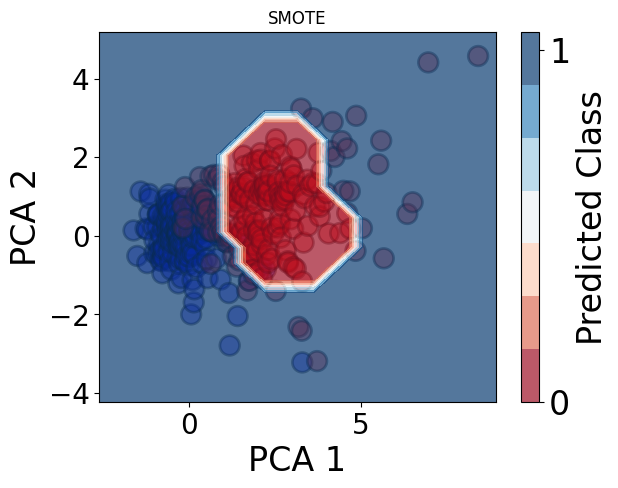

Balanced Weights


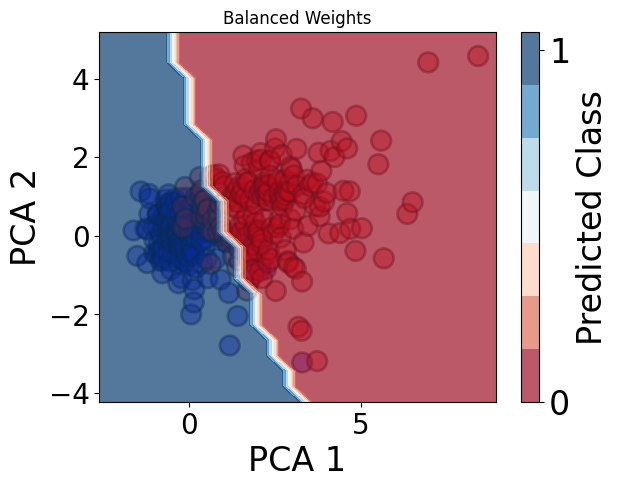

BMR


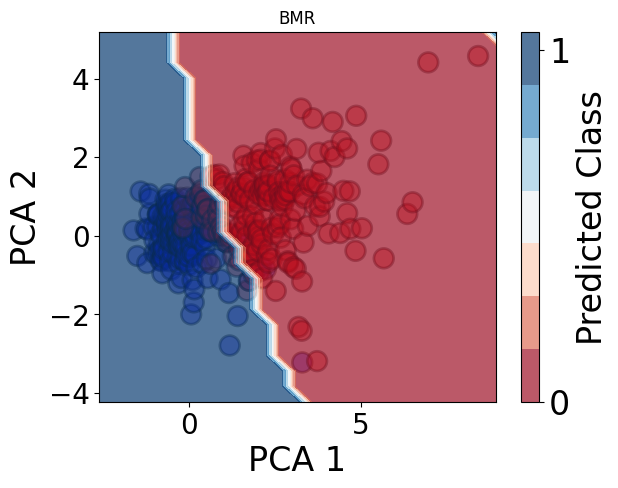

Threshold


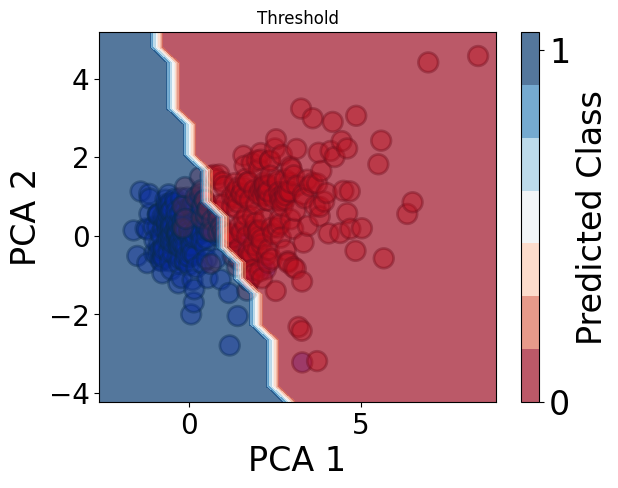

Our Method


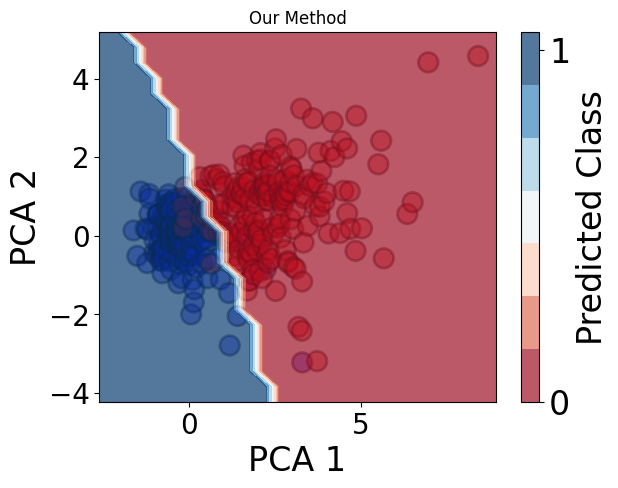

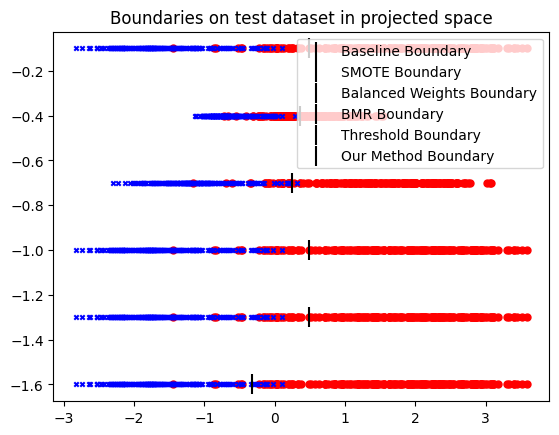

,Accuracy,G-Mean,F1
Method,,,
Baseline,0.919786,0.919866,0.916667
SMOTE,0.756684,0.730297,0.695652
Balanced Weights,0.927807,0.928345,0.926027
BMR,0.933155,0.933700,0.931507
Threshold,0.959893,0.960739,0.960212
Our Method,0.954545,0.953766,0.956962


In [7]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=False,
              _plot=True, dim_reducer=data_clf['dim_reducer'])

Baseline


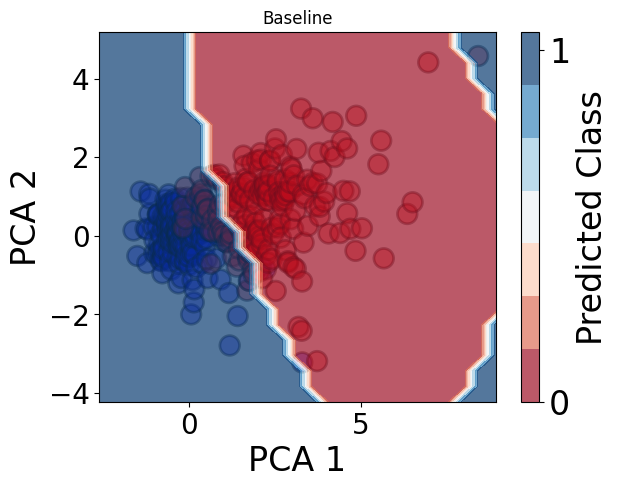

SMOTE


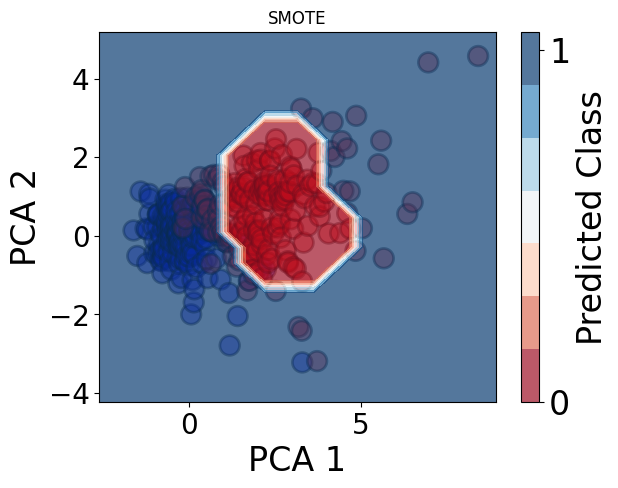

Balanced Weights


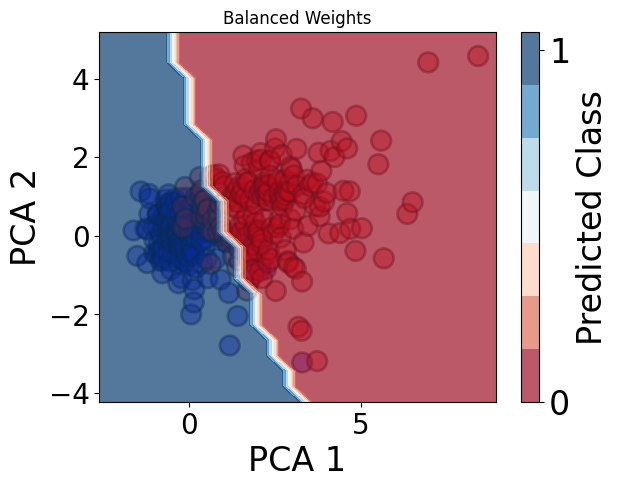

BMR


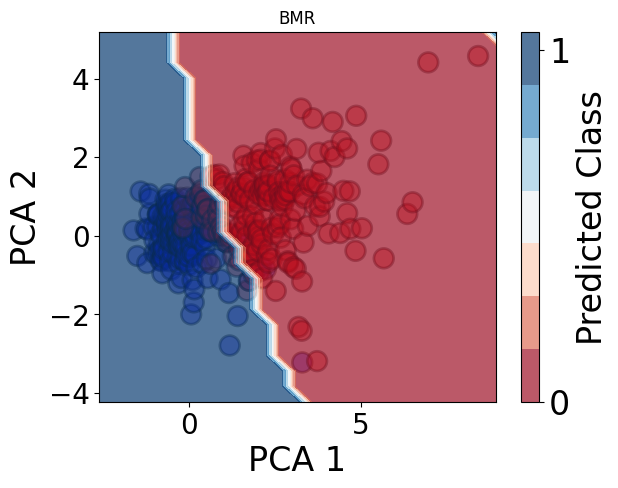

Threshold


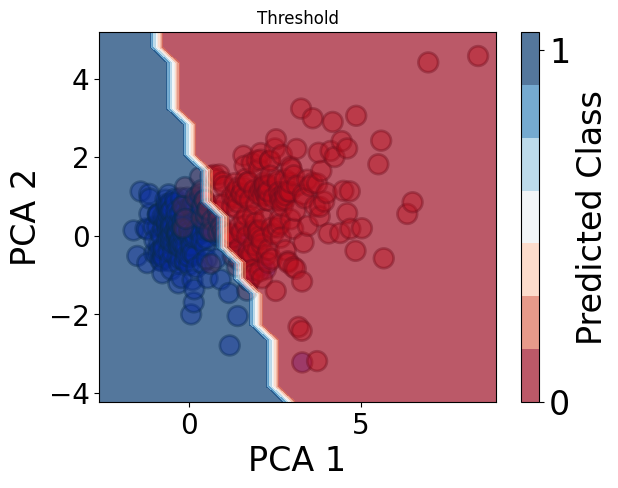

Our Method


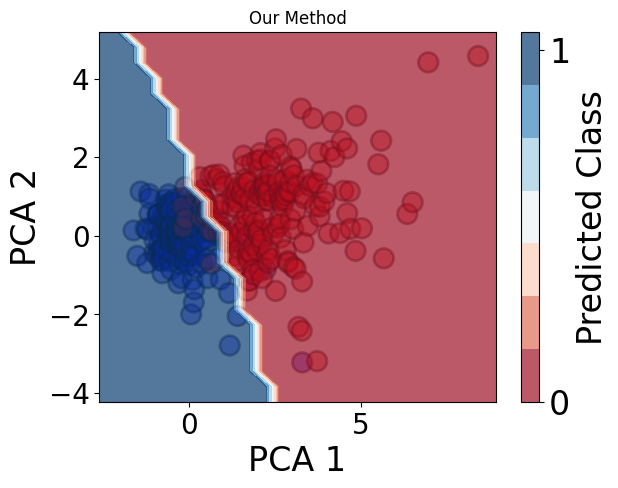

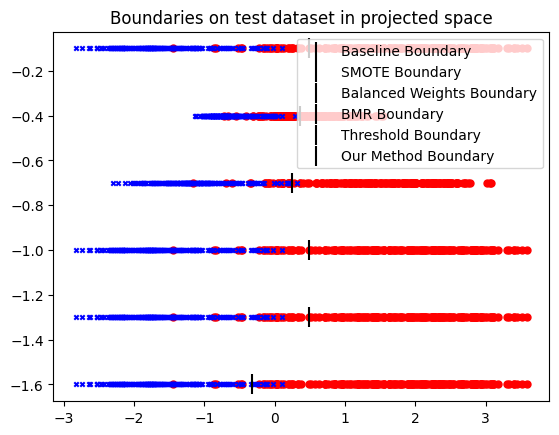

,Accuracy,G-Mean,F1
Method,,,
Baseline,0.919786,0.919866,0.916667
SMOTE,0.756684,0.730297,0.695652
Balanced Weights,0.927807,0.928345,0.926027
BMR,0.933155,0.933700,0.931507
Threshold,0.959893,0.960739,0.960212
Our Method,0.954545,0.953766,0.956962


In [8]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=False,
              _plot=True, dim_reducer=data_clf['dim_reducer'])